### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

#### Credit Approval Dataset

After reviewing all the datasets, I decided to analyze the credit approval dataset. 

**Per UCI Repository**

This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
  
This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values.  There are also a few missing values.

Here's the link to the dataset: https://archive.ics.uci.edu/dataset/27/credit+approval

In [1]:
# import pandas and numpy for basic data processing
# import matplotlib and seaborn for visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# import warnings to suppress unnecessary warnings

import warnings
warnings.filterwarnings("ignore")

# import sklearn packages for k Nearest Neighbor analysis and other feature engineering tasks

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.impute import KNNImputer, SimpleImputer


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

# import packages to calculate MSE, accuracy, precision, recall and roc curve

from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

from sklearn import set_config
set_config("figure")

In [2]:
# import the credit approval dataset from UCI Data Repository

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
credit_approval = fetch_ucirepo(id=27) 
  
# data (as pandas dataframes) 
X = credit_approval.data.features 
y = credit_approval.data.targets 
  
# metadata 
#print(credit_approval.metadata) 
  
# variable information 
print(credit_approval.variables) 

   name     role         type demographic description units missing_values
0   A16   Target  Categorical        None        None  None             no
1   A15  Feature   Continuous        None        None  None             no
2   A14  Feature   Continuous        None        None  None            yes
3   A13  Feature  Categorical        None        None  None             no
4   A12  Feature  Categorical        None        None  None             no
5   A11  Feature   Continuous        None        None  None             no
6   A10  Feature  Categorical        None        None  None             no
7    A9  Feature  Categorical        None        None  None             no
8    A8  Feature   Continuous        None        None  None             no
9    A7  Feature  Categorical        None        None  None            yes
10   A6  Feature  Categorical        None        None  None            yes
11   A5  Feature  Categorical        None        None  None            yes
12   A4  Feature  Categor

In [3]:
X.head(10)

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.250,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.040,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,f,t,1.500,h,q,g,u,0.500,24.50,a
3,3,100.0,g,t,5,t,t,3.750,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.710,v,w,g,u,5.625,20.17,b
5,0,360.0,g,t,0,f,t,2.500,v,m,g,u,4.000,32.08,b
6,31285,164.0,g,t,0,f,t,6.500,h,r,g,u,1.040,33.17,b
7,1349,80.0,g,f,0,f,t,0.040,v,cc,g,u,11.585,22.92,a
8,314,180.0,g,f,0,f,t,3.960,h,k,p,y,0.500,54.42,b
9,1442,52.0,g,t,0,f,t,3.165,v,w,p,y,4.915,42.50,b


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     690 non-null    object 
 6   A9      690 non-null    object 
 7   A8      690 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      690 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 81.0+ KB


In [5]:
# Let's look at the unique values for target variable y
y['A16'].unique()

array(['+', '-'], dtype=object)

In [6]:
# Let's find out all the columns where we have nulls
for col in X.columns:
    if X[col].isna().sum() > 0:
        print (f'Column: {col:>3} of dtype {str(X[col].dtype):>7} has {X[col].nunique():>3} unique values and {X[col].isna().sum():>2} nulls')

Column: A14 of dtype float64 has 170 unique values and 13 nulls
Column:  A7 of dtype  object has   9 unique values and  9 nulls
Column:  A6 of dtype  object has  14 unique values and  9 nulls
Column:  A5 of dtype  object has   3 unique values and  6 nulls
Column:  A4 of dtype  object has   3 unique values and  6 nulls
Column:  A2 of dtype float64 has 349 unique values and 12 nulls
Column:  A1 of dtype  object has   2 unique values and 12 nulls


#### Exclude Data from analysis
We don't have enough information to make determination about the values in these columns. Some of them are categorical (object) and some are numeric (float64). It is best to remove them from the dataset and use only records that have complete data

In [7]:
# Let's identify all the rows that have null values. We will have to remove them from both X and y dataframes

null_index_list = X[X.isnull().any(axis=1)].index.tolist()

In [8]:
# Let's list out the dataframe after removing them. We have 653 rows after exclusion
X.drop(null_index_list)

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,260.0,g,f,0,f,f,1.25,h,e,p,y,10.085,21.08,b
686,394,200.0,g,t,2,t,f,2.00,v,c,g,u,0.750,22.67,a
687,1,200.0,g,t,1,t,f,2.00,ff,ff,p,y,13.500,25.25,a
688,750,280.0,g,f,0,f,f,0.04,v,aa,g,u,0.205,17.92,b


In [9]:
# Similarly, for y dataframe
y.drop(null_index_list)

,A16
0,+
1,+
2,+
3,+
4,+
...,...
685,-
686,-
687,-
688,-


In [10]:
# Let's remove the nulls from X and y and use this for Feature Engineering
# To retain originality of the dataframe, I am not reindexing the dataframe. 

X.drop(null_index_list, inplace=True)
y.drop(null_index_list, inplace=True)

X.shape, y.shape

((653, 15), (653, 1))

In [11]:
X.head(10)

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1
0,0,202.0,g,f,1,t,t,1.250,v,w,g,u,0.000,30.83,b
1,560,43.0,g,f,6,t,t,3.040,h,q,g,u,4.460,58.67,a
2,824,280.0,g,f,0,f,t,1.500,h,q,g,u,0.500,24.50,a
3,3,100.0,g,t,5,t,t,3.750,v,w,g,u,1.540,27.83,b
4,0,120.0,s,f,0,f,t,1.710,v,w,g,u,5.625,20.17,b
5,0,360.0,g,t,0,f,t,2.500,v,m,g,u,4.000,32.08,b
6,31285,164.0,g,t,0,f,t,6.500,h,r,g,u,1.040,33.17,b
7,1349,80.0,g,f,0,f,t,0.040,v,cc,g,u,11.585,22.92,a
8,314,180.0,g,f,0,f,t,3.960,h,k,p,y,0.500,54.42,b
9,1442,52.0,g,t,0,f,t,3.165,v,w,p,y,4.915,42.50,b


In [12]:
y.head(10)

,A16
0,+
1,+
2,+
3,+
4,+
5,+
6,+
7,+
8,+
9,+


### Exploratory Data Analysis

Let's review the data and learn more about each of the attributes

In [13]:
# Let's find out the min and max values of the numerical datasets.

num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [14]:
# Numerical Columns are:
num_cols

['A15', 'A14', 'A11', 'A8', 'A3', 'A2']

In [15]:
X.describe()

,A15,A14,A11,A8,A3,A2
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,1013.761103,180.359877,2.502297,2.244296,4.829533,31.503813
std,5253.278504,168.296811,4.968497,3.371120,5.027077,11.838267
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000
25%,0.000000,73.000000,0.000000,0.165000,1.040000,22.580000
50%,5.000000,160.000000,0.000000,1.000000,2.835000,28.420000
75%,400.000000,272.000000,3.000000,2.625000,7.500000,38.250000
max,100000.000000,2000.000000,67.000000,28.500000,28.000000,76.750000


In [16]:
# Let's plot the numeric values for each of the columns in the Credit Approval Dataset
#X[num_cols].hist(bins=10, grid=False, layout=(5,2), figsize=(15, 18), sharex=False, sharey=False)
#plt.suptitle('Histogram of all the columns by each category',fontsize=(15), y=0.91)
#plt.show()

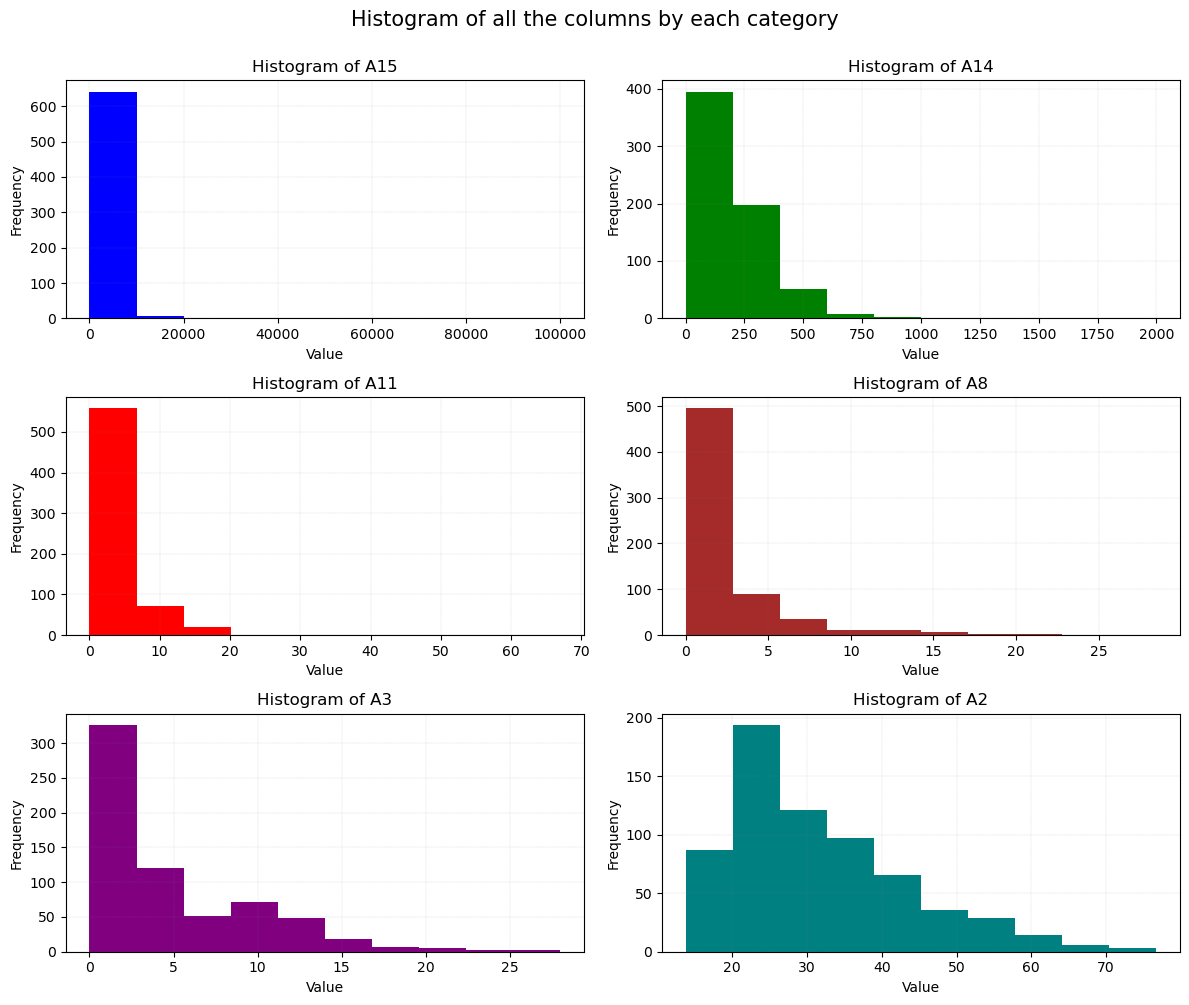

In [17]:
# Let's plot the numeric values for each of the columns in the Credit Approval Dataset

# Create subplots
#fig, axes = plt.subplots(nrows=-int(-len(num_cols)/2), ncols=2, figsize=(12, 10)) 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10)) 

# Iterate through columns and create histograms
colors = ['blue', 'green', 'red','brown','purple','teal'] # Define colors for each histogram
for i, col in enumerate(num_cols):
    r,c = int(i/2),int(i%2)
    axes[r,c].hist(X[col], color=colors[i])
    axes[r,c].set_title(f'Histogram of {col}')
    axes[r,c].set_xlabel('Value')
    axes[r,c].set_ylabel('Frequency')
    axes[r,c].grid(True, color = "grey", linewidth = "0.1", linestyle = "-.")

plt.suptitle('Histogram of all the columns by each category',fontsize=(15),y=1)
#plt.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
plt.tight_layout()
plt.savefig('histogram_numerical_cols.jpeg')
plt.show()

In [18]:
# Let's find out how the target variable is distributed

grouped = y.groupby('A16')['A16'].count()
grouped

A16
+    296
-    357
Name: A16, dtype: int64

In [19]:
# Let's find out the % of data that are benign vs. malignant
round(100 * (grouped/grouped.sum()),2)

A16
+    45.33
-    54.67
Name: A16, dtype: float64

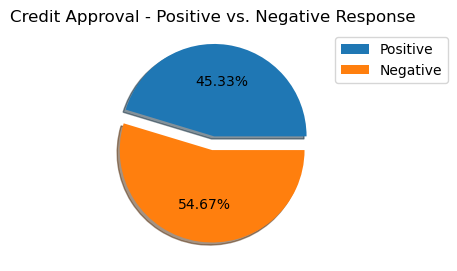

In [20]:
# Let's look at Datast and plot the % of customers that got positive vs negative response on their credit approval

ax = grouped.plot(kind='pie', figsize=(10,3), 
                  grid=False, ylabel='',
                  labels = ['Positive', 'Negative'],
                  shadow=True, explode=[0.1, 0.05],
                  legend=True, labeldistance=None, 
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='upper left')
plt.title('Credit Approval - Positive vs. Negative Response')
plt.savefig('Credit_Approvals.jpeg')
plt.show()

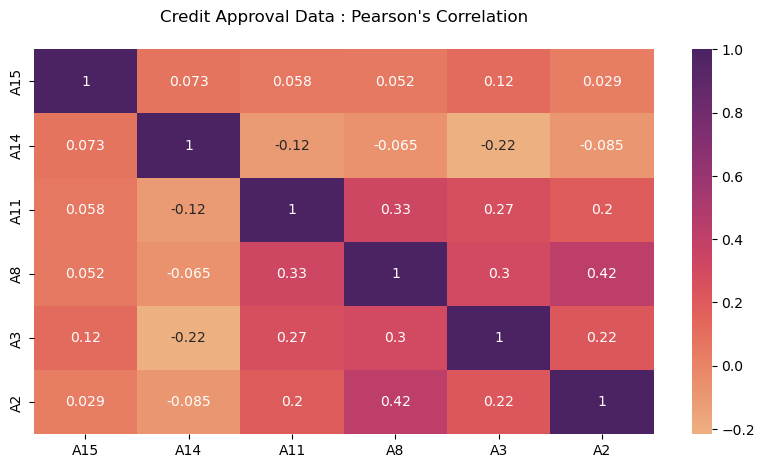

In [21]:
# Let's create a HeatMap to correlate all the numerical datasets

plt.figure(figsize=(10,5))
corr = X[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='flare')
plt.title('Credit Approval Data : Pearson\'s Correlation',y=1.05)
plt.savefig('Pearsons Correlation - Numerical Data.jpeg')
plt.show()

We don't see a good correlation between the numerical values. 

In [22]:
for col in cat_cols:
    print(X[col].unique())

['g' 's' 'p']
['f' 't']
['t' 'f']
['t' 'f']
['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
['g' 'p' 'gg']
['u' 'y' 'l']
['b' 'a']


In [23]:
# Since these values do not mean much, let's use One Hot Encoding for categorical values and Standard Scaler for Numeric

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)])

# Let's create a pipeline to process the data and then apply the k nearest neighbors classifier.

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

credit_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn', KNeighborsClassifier(n_neighbors=5))])

In [24]:
yhat = y['A16'].map({'+': 1, '-': 0})

In [25]:
# Let's split the data into training and test sets. We will use 80% of the data for training and 20% for test.

credit_X_train, credit_X_test, credit_y_train, credit_y_test = train_test_split(X, yhat, test_size = 0.2, random_state=42)

In [26]:
# Now let's fit the credit X train data and y train data into the pipeline and complete the learning process
credit_pipeline.fit(credit_X_train, credit_y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['A15', 'A14', 'A11', 'A8',
                                                   'A3', 'A2']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['A13', 'A12', 'A10', 'A9',
                                                   'A7', 'A6', 'A5', 'A4',
                                                   'A1'])])),
                ('knn', KNeighborsClassifier())])

In [27]:
# Now that credit_pipeline has learned the data and the model is ready for prediction, let's predit the results based on credit_X_test data

credit_preds = credit_pipeline.predict(credit_X_test)

credit_preds

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [28]:
# probability of getting output as + : Credit Accepted

credit_pipeline.predict_proba(credit_X_test)[:,0]

array([0.4, 0.8, 0.2, 0.8, 1. , 1. , 1. , 0. , 0.6, 1. , 0.4, 0.6, 0.8,
       0.2, 1. , 0. , 0. , 0.8, 0.8, 1. , 0. , 0. , 0.8, 0.8, 0.4, 0.2,
       1. , 0.6, 1. , 0.6, 0. , 1. , 0. , 0. , 1. , 0.6, 0.2, 1. , 1. ,
       0.8, 1. , 0.8, 0.2, 0.8, 0. , 1. , 1. , 0.2, 0.8, 0.4, 0.8, 0.4,
       0. , 1. , 1. , 0. , 1. , 0. , 0.6, 0.4, 0.2, 1. , 0.8, 0.4, 0. ,
       0.8, 1. , 1. , 1. , 0.6, 1. , 1. , 0. , 0.8, 0.8, 0.8, 0.6, 0. ,
       0.6, 0.8, 0. , 0. , 1. , 0.6, 1. , 0.2, 0.6, 0.2, 0.2, 1. , 1. ,
       0.6, 0.8, 1. , 0. , 1. , 0.4, 0.6, 0.4, 0.8, 1. , 1. , 0.8, 0.4,
       0.2, 0. , 0. , 0.2, 0.8, 0.4, 0.8, 0.4, 0.4, 0. , 0.8, 1. , 0.2,
       1. , 0.4, 0. , 0. , 0.6, 1. , 0.6, 1. , 0. , 1. , 1. , 1. , 0.6,
       1. ])

In [29]:
# probability of getting output as - : Credit Not Accepted

credit_pipeline.predict_proba(credit_X_test)[:,1]

array([0.6, 0.2, 0.8, 0.2, 0. , 0. , 0. , 1. , 0.4, 0. , 0.6, 0.4, 0.2,
       0.8, 0. , 1. , 1. , 0.2, 0.2, 0. , 1. , 1. , 0.2, 0.2, 0.6, 0.8,
       0. , 0.4, 0. , 0.4, 1. , 0. , 1. , 1. , 0. , 0.4, 0.8, 0. , 0. ,
       0.2, 0. , 0.2, 0.8, 0.2, 1. , 0. , 0. , 0.8, 0.2, 0.6, 0.2, 0.6,
       1. , 0. , 0. , 1. , 0. , 1. , 0.4, 0.6, 0.8, 0. , 0.2, 0.6, 1. ,
       0.2, 0. , 0. , 0. , 0.4, 0. , 0. , 1. , 0.2, 0.2, 0.2, 0.4, 1. ,
       0.4, 0.2, 1. , 1. , 0. , 0.4, 0. , 0.8, 0.4, 0.8, 0.8, 0. , 0. ,
       0.4, 0.2, 0. , 1. , 0. , 0.6, 0.4, 0.6, 0.2, 0. , 0. , 0.2, 0.6,
       0.8, 1. , 1. , 0.8, 0.2, 0.6, 0.2, 0.6, 0.6, 1. , 0.2, 0. , 0.8,
       0. , 0.6, 1. , 1. , 0.4, 0. , 0.4, 0. , 1. , 0. , 0. , 0. , 0.4,
       0. ])

In [30]:
print (credit_preds[:10])
print (credit_pipeline.predict_proba(credit_X_test)[:10,0])
print (credit_pipeline.predict_proba(credit_X_test)[:10,1])

[1 0 1 0 0 0 0 1 0 0]
[0.4 0.8 0.2 0.8 1.  1.  1.  0.  0.6 1. ]
[0.6 0.2 0.8 0.2 0.  0.  0.  1.  0.4 0. ]


In [31]:
# Let's review the probability for the first 10 records
for i in range (10):
    print (f'credit_preds : {credit_preds[i]} \
probability for 1 (+) : {round(100*credit_pipeline.predict_proba(credit_X_test)[i,0]):>3}% \
and 0 (-) : {round(100*credit_pipeline.predict_proba(credit_X_test)[i,1]):>3}%')

credit_preds : 1 probability for 1 (+) :  40% and 0 (-) :  60%
credit_preds : 0 probability for 1 (+) :  80% and 0 (-) :  20%
credit_preds : 1 probability for 1 (+) :  20% and 0 (-) :  80%
credit_preds : 0 probability for 1 (+) :  80% and 0 (-) :  20%
credit_preds : 0 probability for 1 (+) : 100% and 0 (-) :   0%
credit_preds : 0 probability for 1 (+) : 100% and 0 (-) :   0%
credit_preds : 0 probability for 1 (+) : 100% and 0 (-) :   0%
credit_preds : 1 probability for 1 (+) :   0% and 0 (-) : 100%
credit_preds : 0 probability for 1 (+) :  60% and 0 (-) :  40%
credit_preds : 0 probability for 1 (+) : 100% and 0 (-) :   0%


In [32]:
# Let's find out the model accuracy for kNN when nearest neighbor was set to default value of 5

print('Model accuracy score: {0:0.2f} %'. format(100*accuracy_score(credit_y_test, credit_preds)))

Model accuracy score: 80.15 %


In [33]:
#let us print the confusion matrix for the above prediction

cm = confusion_matrix(credit_y_test, credit_preds)

print (cm)

y_pred_1d = credit_preds.ravel()
y_test_1d = credit_y_test.values.ravel()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[65 11]
 [15 40]]


Predicted,0,1,All
True,,,
0,65,11,76
1,15,40,55
All,80,51,131


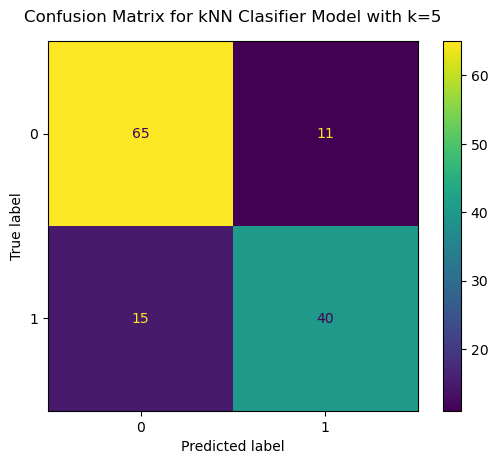

In [34]:
# Lets use the Confusion Matrix Display package to display the Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for kNN Clasifier Model with k=5', y=1.03)
plt.show()

In [35]:
y_pred_proba = credit_pipeline.predict_proba(credit_X_test)[:,1]

In [36]:
fpr, tpr, thresholds = roc_curve(credit_y_test, y_pred_proba)

In [37]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.03947368, 0.14473684, 0.27631579,
        0.51315789, 1.        ]),
 array([0.        , 0.43636364, 0.61818182, 0.72727273, 0.83636364,
        0.94545455, 1.        ]),
 array([inf, 1. , 0.8, 0.6, 0.4, 0.2, 0. ]))

In [38]:
# Area under ROC curve
knn_roc_auc = roc_auc_score(credit_y_test, y_pred_proba)

print ('The KNN ROC Accuracy Score is {}'.format(round(knn_roc_auc,2)))

The KNN ROC Accuracy Score is 0.88


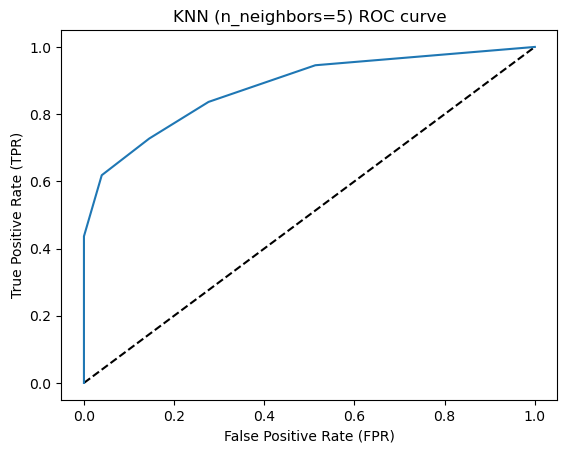

In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' %knn_roc_auc)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('KNN (n_neighbors=5) ROC curve')
plt.show()

In [40]:
k_range = range(1, 31)
scores_list = []
for k in k_range:
    knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn', KNeighborsClassifier(n_neighbors=k))])

    
    knn_pipeline.fit(credit_X_train, credit_y_train)
    y_pred = knn_pipeline.predict(credit_X_test)
    scores_list.append(accuracy_score(credit_y_test, y_pred))

In [41]:
# Print accruacy scores for kNN for k value of 1 through 14 
for i, v in enumerate(scores_list): print (f'k = {i+1}, Accuracy score = {v:.4f}')

k = 1, Accuracy score = 0.8092
k = 2, Accuracy score = 0.7786
k = 3, Accuracy score = 0.8244
k = 4, Accuracy score = 0.8168
k = 5, Accuracy score = 0.8015
k = 6, Accuracy score = 0.8244
k = 7, Accuracy score = 0.8244
k = 8, Accuracy score = 0.8168
k = 9, Accuracy score = 0.8321
k = 10, Accuracy score = 0.8626
k = 11, Accuracy score = 0.8626
k = 12, Accuracy score = 0.8702
k = 13, Accuracy score = 0.8397
k = 14, Accuracy score = 0.8550
k = 15, Accuracy score = 0.8550
k = 16, Accuracy score = 0.8473
k = 17, Accuracy score = 0.8397
k = 18, Accuracy score = 0.8473
k = 19, Accuracy score = 0.8473
k = 20, Accuracy score = 0.8397
k = 21, Accuracy score = 0.8321
k = 22, Accuracy score = 0.8473
k = 23, Accuracy score = 0.8473
k = 24, Accuracy score = 0.8397
k = 25, Accuracy score = 0.8473
k = 26, Accuracy score = 0.8473
k = 27, Accuracy score = 0.8397
k = 28, Accuracy score = 0.8473
k = 29, Accuracy score = 0.8473
k = 30, Accuracy score = 0.8550


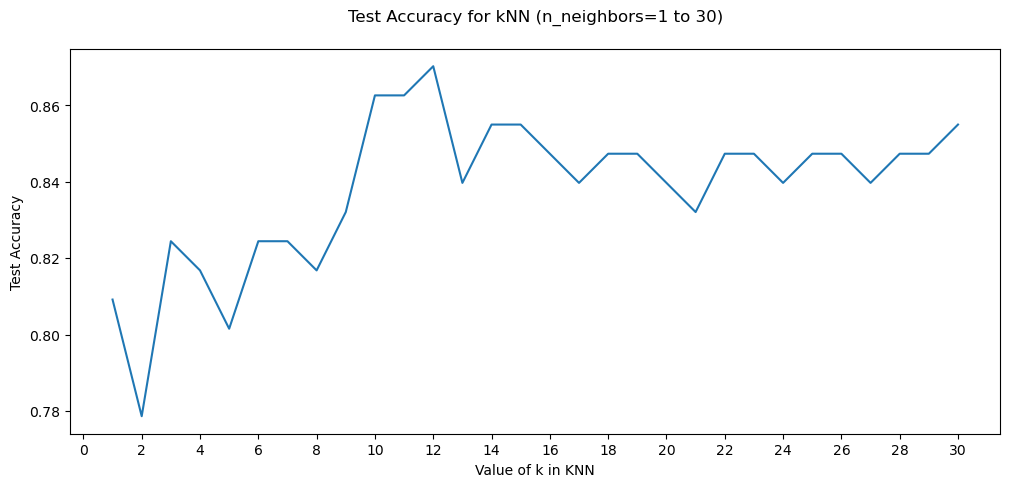

In [42]:
# The k value of 12 shows the most promising

# Let's plot the scores for all 20 values of k

plt.figure(figsize=(12,5))
plt.plot(k_range, scores_list)
plt.xticks([i for i in range(0,31,2)])
plt.xlabel("Value of k in KNN")
plt.ylabel("Test Accuracy")
plt.title('Test Accuracy for kNN (n_neighbors=1 to 30)',y=1.05)
plt.show()

In [54]:
# Let's predict at kNN = 12
credit_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('knn', KNeighborsClassifier(n_neighbors=12))])

credit_pipeline.fit(credit_X_train, credit_y_train)
y_pred = credit_pipeline.predict(credit_X_test)
y_pred_proba = credit_pipeline.predict_proba(credit_X_test)

# Let's find out the model accuracy for kNN when nearest neighbor is set to 12

print('Model accuracy score: {0:0.2f} %'. format(100*accuracy_score(credit_y_test, y_pred)))

Model accuracy score: 87.02 %


In [56]:
#let us print the confusion matrix for the above prediction

cm = confusion_matrix(credit_y_test, y_pred)

print (cm)

y_pred_1d = credit_preds.ravel()
y_test_1d = credit_y_test.values.ravel()
pd.crosstab(y_test_1d, y_pred_1d, rownames=['True'], colnames=['Predicted'], margins=True)

[[71  5]
 [12 43]]


Predicted,0,1,All
True,,,
0,69,7,76
1,14,41,55
All,83,48,131


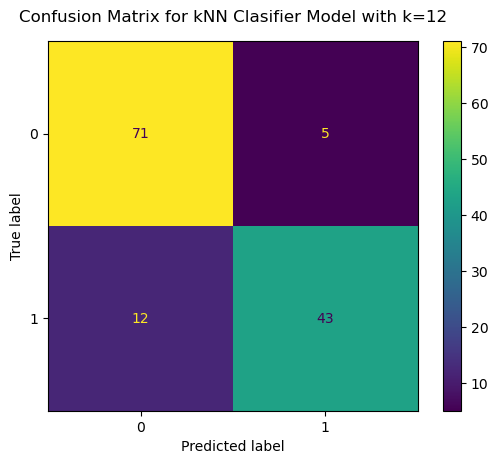

In [58]:
# Lets use the Confusion Matrix Display package to display the Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for kNN Clasifier Model with k=12', y=1.03)
plt.show()

In [44]:
# First 10 rows of the prediction probabilities
y_pred_proba[:10]

array([[0.33333333, 0.66666667],
       [0.75      , 0.25      ],
       [0.08333333, 0.91666667],
       [0.91666667, 0.08333333],
       [0.91666667, 0.08333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ]])

In [45]:
# Get the precision, recall values for each threshold from 0.0 through 1.0 with an interval of 0.1

def precision_recall_thresh(predict_probs, y_test, thresh, choice):

    preds = np.where(predict_probs >= thresh, 1, 0)

    if choice == 'precision':    
        return precision_score(y_test, preds) #, pos_label='Yes')
    elif choice == 'recall':
        return recall_score(y_test, preds) #, pos_label='Yes')
    else: return None

thresholds = np.arange(0, 1, .1)

results_df = pd.DataFrame({'threshold': thresholds, 
                           'precision': [precision_recall_thresh(y_pred_proba[:,1], credit_y_test, i,'precision') for i in thresholds],
                           'recall': [precision_recall_thresh(y_pred_proba[:,1], credit_y_test,i,'recall') for i in thresholds]
                          })

In [46]:
# Print the results of the precision, recall, threshold dataframe for kNN with n_neighors = 12
results_df

,threshold,precision,recall
0,0.0,0.419847,1.000000
1,0.1,0.595506,0.963636
2,0.2,0.641026,0.909091
3,0.3,0.705882,0.872727
4,0.4,0.737705,0.818182
5,0.5,0.811321,0.781818
6,0.6,0.880952,0.672727
7,0.7,0.921053,0.636364
8,0.8,1.000000,0.527273
9,0.9,1.000000,0.418182


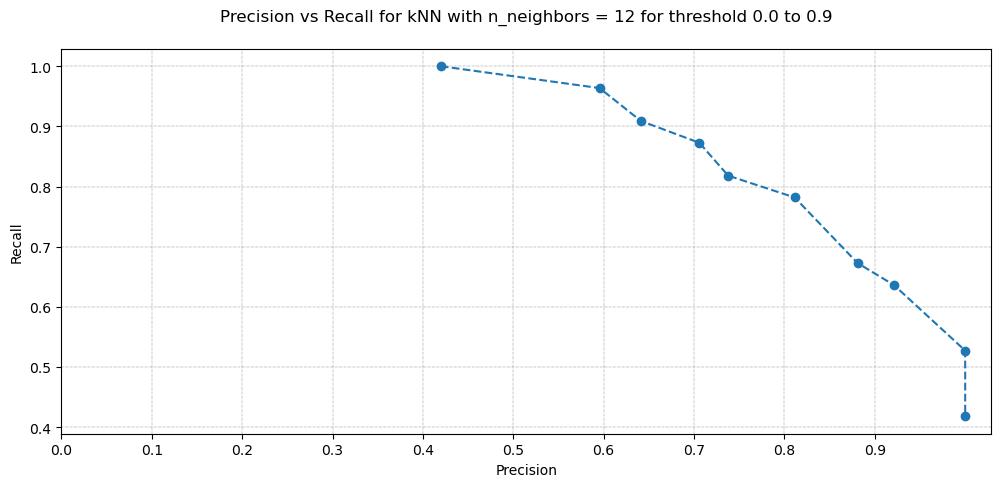

In [47]:
plt.figure(figsize=(12,5))
plt.plot(results_df.precision, results_df.recall, '--o')
plt.xticks(thresholds);
plt.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall for kNN with n_neighbors = 12 for threshold 0.0 to 0.9',y=1.05);

In [48]:
# Let's get the precision recall curve created for kNN with n_neighbors = 12

precision, recall, boundaries = precision_recall_curve(credit_y_test, y_pred_proba[:,1]) #, pos_label='Yes')

First 5 boundaries are : [0.         0.08333333 0.16666667 0.25       0.33333333] 

First 5 precisions are : [0.41984733 0.48214286 0.59550562 0.64102564 0.70588235] 

First 5 recall are     : [1.         0.98181818 0.96363636 0.90909091 0.87272727] 



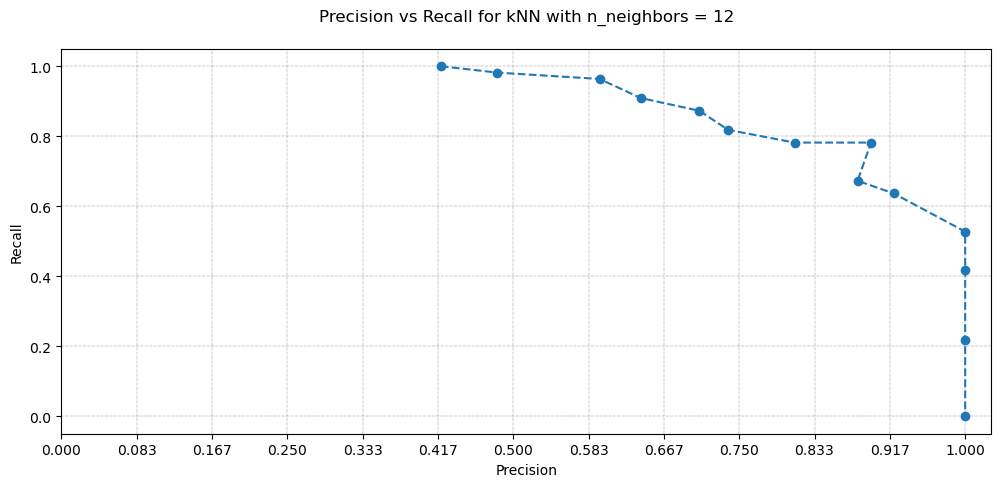

In [49]:
print('First 5 boundaries are :', boundaries[:5],'\n')
print('First 5 precisions are :', precision[:5],'\n')
print('First 5 recall are     :', recall[:5],'\n')

plt.figure(figsize=(12,5))
plt.plot(precision, recall, '--o')
plt.xticks(boundaries);
plt.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall for kNN with n_neighbors = 12',y=1.05)
plt.savefig('Precision_vs_Recall_kNN-12.jpeg')
plt.show()

False Positive Rates:  [0.         0.         0.         0.         0.03947368]
True Positive Rates :  [0.         0.21818182 0.41818182 0.52727273 0.63636364]


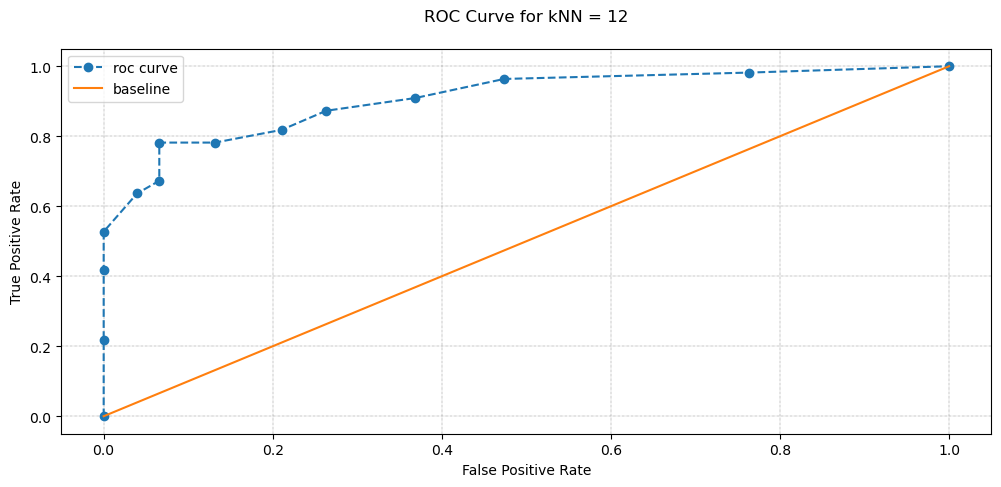

In [50]:
### GRADED
fpr, tpr, thresh_rocs = '', '', ''

### BEGIN SOLUTION
fpr, tpr, thresh_rocs = roc_curve(credit_y_test, y_pred_proba[:,1]) #, pos_label='Yes')
### END SOLUTION

# Answer check

print('False Positive Rates: ', fpr[:5])
print('True Positive Rates : ', tpr[:5])

plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()

plt.title('ROC Curve for kNN = 12',y=1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
plt.savefig('ROC_Curve_kNN-12.jpeg')
plt.show()

In [51]:
roc_grid = ''
best_k = ''

### BEGIN SOLUTION
knn_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=1))])
roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
roc_grid.fit(credit_X_train, credit_y_train)
best_k = roc_grid.best_params_['knn__n_neighbors']
best_k

27

In [52]:
credit_pipe_27 = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=20))])
credit_pipe_27.fit(credit_X_train, credit_y_train)
credit_preds = credit_pipe_27.predict(credit_X_test)
print('Model accuracy score: {0:0.2f} %'. format(100*accuracy_score(credit_y_test, credit_preds)))

Model accuracy score: 83.97 %


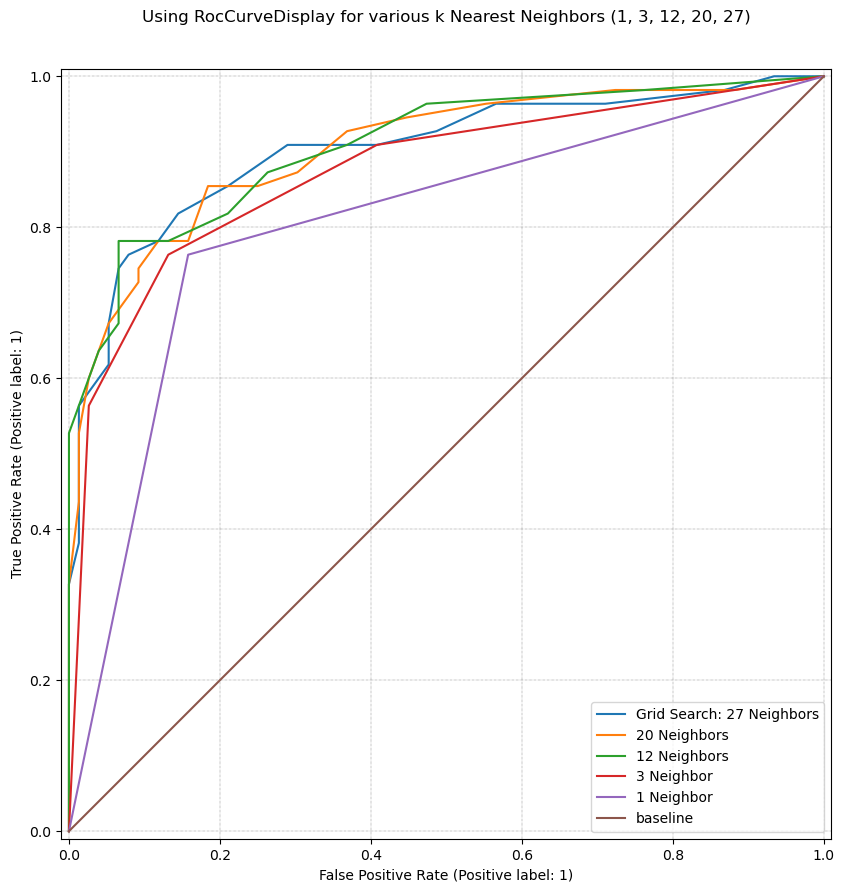

In [53]:
# Let's create 
credit_pipe_1 = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=1))])
credit_pipe_1.fit(credit_X_train, credit_y_train)

credit_pipe_3 = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=3))])
credit_pipe_3.fit(credit_X_train, credit_y_train)

credit_pipe_12 = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=12))])
credit_pipe_12.fit(credit_X_train, credit_y_train)

credit_pipe_20 = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier(n_neighbors=20))])
credit_pipe_20.fit(credit_X_train, credit_y_train)

#plt.rcParams['figure.figsize'] = [20, 8]
#plt.figure(figsize = (20,5))
fig, ax = plt.subplots(1,1,figsize=(10,10))
RocCurveDisplay.from_estimator(roc_grid,       credit_X_test, credit_y_test, ax = ax, label = 'Grid Search: 27 Neighbors')
RocCurveDisplay.from_estimator(credit_pipe_20, credit_X_test, credit_y_test, ax = ax, label = '20 Neighbors')
RocCurveDisplay.from_estimator(credit_pipe_12, credit_X_test, credit_y_test, ax = ax, label = '12 Neighbors')
RocCurveDisplay.from_estimator(credit_pipe_3,  credit_X_test, credit_y_test, ax = ax, label = '3 Neighbor')
RocCurveDisplay.from_estimator(credit_pipe_1,  credit_X_test, credit_y_test, ax = ax, label = '1 Neighbor')

plt.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay for various k Nearest Neighbors (1, 3, 12, 20, 27)', y=1.05)
plt.legend()
plt.savefig('roc_credit.jpeg')
plt.show()